<a href="https://colab.research.google.com/github/JSchoonmaker/FCC-Machine-Learning-Projs/blob/main/fcc_sms_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you need to create a machine learning model that will classify SMS messages as either "ham" or "spam". A "ham" message is a normal message sent by a friend. A "spam" message is an advertisement or a message sent by a company.

You should create a function called `predict_message` that takes a message string as an argument and returns a list. The first element in the list should be a number between zero and one that indicates the likeliness of "ham" (0) or "spam" (1). The second element in the list should be the word "ham" or "spam", depending on which is most likely.

For this challenge, you will use the [SMS Spam Collection dataset](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/). The dataset has already been grouped into train data and test data.

The first two cells import the libraries and data. The final cell tests your model and function. Add your code in between these cells.


In [2]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

     |████████████████████████████████| 455.9MB 37kB/s 
     |████████████████████████████████| 4.0MB 9.0MB/s 
     |████████████████████████████████| 471kB 40.5MB/s 
     |████████████████████████████████| 6.0MB 51.8MB/s 
     |████████████████████████████████| 1.2MB 53.0MB/s 
     |████████████████████████████████| 4.0MB 42.9MB/s 
     |████████████████████████████████| 3.9MB 43.8MB/s 
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.34.1 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
  Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: h5py 2.10.0
    Uninstallin

In [3]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2021-04-09 02:41:13--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv          [ <=>                ] 349.84K  --.-KB/s    in 0.03s   

2021-04-09 02:41:13 (11.6 MB/s) - ‘train-data.tsv’ saved [358233]

--2021-04-09 02:41:13--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv          [ <=>                ] 115

In [4]:
df = pd.read_csv('train-data.tsv', delimiter='\t', names=['classifier', 'text'])
df

,classifier,text
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4174,ham,just woke up. yeesh its late. but i didn't fal...
4175,ham,what do u reckon as need 2 arrange transport i...
4176,spam,free entry into our £250 weekly competition ju...
4177,spam,-pls stop bootydelious (32/f) is inviting you ...


In [5]:
df['classifier'] = df['classifier'].apply(lambda x: 1 if 'spam' in x else 0)
df

,classifier,text
0,0,ahhhh...just woken up!had a bad dream about u ...
1,0,you can never do nothing
2,0,"now u sound like manky scouse boy steve,like! ..."
3,0,mum say we wan to go then go... then she can s...
4,0,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4174,0,just woke up. yeesh its late. but i didn't fal...
4175,0,what do u reckon as need 2 arrange transport i...
4176,1,free entry into our £250 weekly competition ju...
4177,1,-pls stop bootydelious (32/f) is inviting you ...


In [6]:
y_train = df.classifier
X_train = df.text

0       0
1       0
2       0
3       0
4       0
       ..
4174    0
4175    0
4176    1
4177    1
4178    0
Name: classifier, Length: 4179, dtype: int64
0       ahhhh...just woken up!had a bad dream about u ...
1                                you can never do nothing
2       now u sound like manky scouse boy steve,like! ...
3       mum say we wan to go then go... then she can s...
4       never y lei... i v lazy... got wat? dat day ü ...
                              ...                        
4174    just woke up. yeesh its late. but i didn't fal...
4175    what do u reckon as need 2 arrange transport i...
4176    free entry into our £250 weekly competition ju...
4177    -pls stop bootydelious (32/f) is inviting you ...
4178    tell my  bad character which u dnt lik in me. ...
Name: text, Length: 4179, dtype: object


In [7]:
df1 = pd.read_csv('valid-data.tsv', delimiter='\t', names=['classifier', 'text'])
df1

,classifier,text
0,ham,i am in hospital da. . i will return home in e...
1,ham,"not much, just some textin'. how bout you?"
2,ham,i probably won't eat at all today. i think i'm...
3,ham,don‘t give a flying monkeys wot they think and...
4,ham,who are you seeing?
...,...,...
1387,ham,true dear..i sat to pray evening and felt so.s...
1388,ham,"what will we do in the shower, baby?"
1389,ham,where are you ? what are you doing ? are yuou ...
1390,spam,ur cash-balance is currently 500 pounds - to m...


In [8]:
df1['classifier'] = df1['classifier'].apply(lambda x: 1 if 'spam' in x else 0)
df1

,classifier,text
0,0,i am in hospital da. . i will return home in e...
1,0,"not much, just some textin'. how bout you?"
2,0,i probably won't eat at all today. i think i'm...
3,0,don‘t give a flying monkeys wot they think and...
4,0,who are you seeing?
...,...,...
1387,0,true dear..i sat to pray evening and felt so.s...
1388,0,"what will we do in the shower, baby?"
1389,0,where are you ? what are you doing ? are yuou ...
1390,1,ur cash-balance is currently 500 pounds - to m...


In [9]:
y_val = df1.classifier
X_val = df1.text

0       0
1       0
2       0
3       0
4       0
       ..
1387    0
1388    0
1389    0
1390    1
1391    1
Name: classifier, Length: 1392, dtype: int64
0       i am in hospital da. . i will return home in e...
1              not much, just some textin'. how bout you?
2       i probably won't eat at all today. i think i'm...
3       don‘t give a flying monkeys wot they think and...
4                                     who are you seeing?
                              ...                        
1387    true dear..i sat to pray evening and felt so.s...
1388                 what will we do in the shower, baby?
1389    where are you ? what are you doing ? are yuou ...
1390    ur cash-balance is currently 500 pounds - to m...
1391    not heard from u4 a while. call 4 rude chat pr...
Name: text, Length: 1392, dtype: object


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

lst = X_train.tolist()
vectorizer = TfidfVectorizer(
input= lst ,  # input is the actual text
lowercase=True,      # convert to lowercase before tokenizing
#stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(lst) #gives tf idf vector for x_train
features_test_transformed  = vectorizer.transform(X_val) #gives tf idf vector for x_test


[03:06:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.00443718 0.00443718 0.09368926 ... 0.01843929 0.8529161  0.6429615 ]
Accuracy Score on XGBoost: 
 97.5574712643678

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1205
           1       0.99      0.83      0.90       187

    accuracy                           0.98      1392
   macro avg       0.98      0.91      0.94      1392
weighted avg       0.98      0.98      0.97      1392



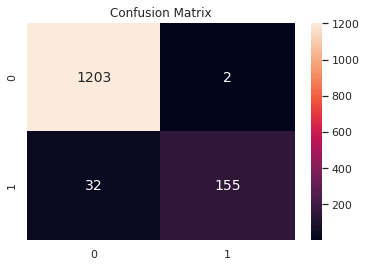

In [35]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
import seaborn as sn
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr

xgb = XGBRegressor(n_estimators=300, learning_rate=0.075)
xgb.fit(features_train_transformed, y_train)
  #xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

predicted1 = xgb.predict(features_test_transformed)
print(predicted1)
score1 = accuracy_score(y_val, (predicted1 > 0.5))
print('Accuracy Score on XGBoost: \n', (100*score1))
cm2 = cm(y_val, predicted1 > 0.5, labels=[0, 1])
df_cm = pd.DataFrame(cm2, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
print('\nClassification Report: \n', cr(y_val, (predicted1 > 0.5)))

Scores from XGBoost are good, but testing RandomForestClassifier to see if results are stronger - decide to stick with XGBoost


In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier1=RandomForestClassifier(n_estimators=50,criterion='entropy')
classifier1.fit(features_train_transformed, y_train)
predRF=classifier1.predict(features_test_transformed)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score: {}'.format(accuracy_score(y_val, predRF)))
print('Precision score: {}'.format(precision_score(y_val, predRF)))
print('Recall score: {}'.format(recall_score(y_val, predRF)))
print('F1 score: {}'.format(f1_score(y_val, predRF)))

Accuracy score: 0.9727011494252874
Precision score: 1.0
Recall score: 0.7967914438502673
F1 score: 0.8869047619047619


In [36]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  prediction = []
  pred_text_list = [pred_text]
  text_transform = vectorizer.transform(pred_text_list)

  predict1 = xgb.predict(text_transform)

  for each in predict1:
    prediction.append(each)
    if each> 0.05:
      prediction.append('spam')
    else:
      prediction.append('ham')

  return (prediction)

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

[0.0044371784, 'ham']


In [38]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


You passed the challenge. Great job!
